In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
from random import random
from tqdm.notebook import tqdm

In [3]:
import time
import multiprocess as mp

### Read data & preprocessing

In [4]:
df_ref = pd.read_csv('./Data/glioblastoma_BT_S2/ref.csv', index_col = 0)
df_alt = pd.read_csv('./Data/glioblastoma_BT_S2/alt.csv', index_col = 0)

In [5]:
# use multi-index for easier handling of the data
df_ref['chromosome'] = [locus.split('_')[0] for locus in df_ref.index]
df_ref['locus'] = [locus.split('_')[1] for locus in df_ref.index]
df_ref = df_ref.set_index(['chromosome', 'locus'])

df_alt['chromosome'] = [locus.split('_')[0] for locus in df_alt.index]
df_alt['locus'] = [locus.split('_')[1] for locus in df_alt.index]
df_alt = df_alt.set_index(['chromosome', 'locus'])

In [6]:
df_ref

SRR3934349  SRR3934350  SRR3934351  SRR3934352  \
chromosome locus                                                       
chr1       629782             62           0           9          25   
           631861              0           0           6           5   
           633792             92          30          40         138   
           633801             94          27          37         139   
           634233              4           0           2           3   
...                          ...         ...         ...         ...   
chrX       154778966           0           0           0           0   
           154801469           0           0           0           0   
           155051675           0           0          47          47   
           155061890           0           0           8          32   
           155943589           0           0           0           3   

                      SRR3934353  SRR3934354  SRR3934355  SRR3934356  \
chromosome locus                                                       
chr1       629782             20          71          13          10   
           631861             15          36           2           6   
           633792            308         342          17          46   
           633801            301         330          17          46   
           634233             16           9           0           0   
...                          ...         ...         ...         ...   
chrX       154778966           0          34           1           0   
           154801469           0           0           0           0   
           155051675           0           0          17           0   
           155061890           0           0           9           0   
           155943589           0           0           4           0   

                      SRR3934357  SRR3934358  ...  SRR3935507  SRR3935508  \
chromosome locus                              ...                           
chr1       629782             29           0  ...           6           2   
           631861             11           0  ...           0          21   
           633792            151           0  ...          73          43   
           633801            140           0  ...          75          42   
           634233              3           0  ...           0           0   
...                          ...         ...  ...         ...         ...   
chrX       154778966           0           0  ...           0           0   
           154801469           0           0  ...           0           0   
           155051675           0          22  ...           0          40   
           155061890           0           0  ...           0           0   
           155943589           0           6  ...          16          11   

                      SRR3935509  SRR3935510  SRR3935511  SRR3935512  \
chromosome locus                                                       
chr1       629782              4          20           1           3   
           631861              1           0           0           0   
           633792              9          34           0          23   
           633801              9          33           0          22   
           634233              1           1           0           0   
...                          ...         ...         ...         ...   
chrX       154778966           0           0           0           0   
           154801469           0           0           0           0   
           155051675           0           0           0           0   
           155061890           0           0           0           0   
           155943589           0          19           0          11   

                      SRR3935513  SRR3935514  SRR3935515  SRR3935516  
chromosome locus                                                      
chr1       629782             21          23           3           

### Utility functions

### Data generator

### Mutation detection

In [7]:
from mutation_detection import *

In [8]:
ref = df_ref.to_numpy(dtype = float)
alt = df_alt.to_numpy(dtype = float)
coverages = ref.flatten() + alt.flatten()

In [9]:
def test_thread_numbers(max_n_threads, n_loci = 50):  
    time_costs = np.zeros(max_n_threads)
    for n in tqdm(range(1,max_n_threads+1)): 
        start_time = time.time()
        get_posteriors(ref[0:n_loci,:], alt[0:n_loci,:], df_ref.index[0:n_loci], n_threads = n)
        time_costs[n-1] = time.time() - start_time
    
    return time_costs

  0%|          | 0/12 [00:00<?, ?it/s]

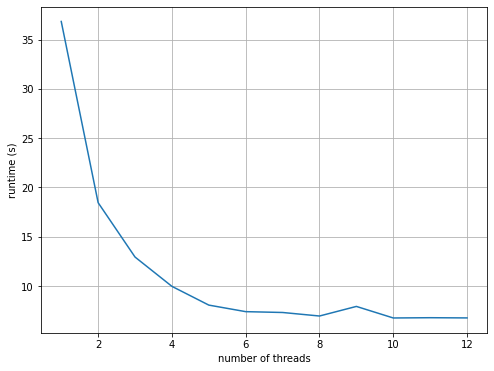

In [30]:
time_costs = test_thread_numbers(12)

plt.figure(figsize = (8,6))
plt.plot(np.array(range(1, 13)), time_costs)
plt.xlabel('number of threads')
plt.ylabel('runtime (s)')
plt.grid()
plt.show()

In [32]:
# expected runtime (in minutes) to run on the complete dataset
time_costs[5] / 50 * ref.shape[0] / 60

39.866198600927994

In [12]:
get_posteriors(ref[:20], alt[:20], df_ref.index[:20], n_threads = 6)

R              H    A        RH             HA
chromosome locus                                                              
chr1       629782    8.749489e-01   0.000000e+00  0.0  0.125051   0.000000e+00
           631861   1.246974e-254   0.000000e+00  0.0  1.000000   0.000000e+00
           633792    9.790680e-01   0.000000e+00  0.0  0.020932   0.000000e+00
           633801    9.875496e-01   0.000000e+00  0.0  0.012450   0.000000e+00
           634233   5.687360e-254  2.466581e-102  0.0  1.000000  1.084478e-103
           634238    0.000000e+00   4.857885e-23  0.0  1.000000   3.092897e-24
           634243    0.000000e+00   1.188269e-25  0.0  1.000000   7.096140e-27
           634250    3.219172e-01   0.000000e+00  0.0  0.678083   0.000000e+00
           634254    9.501829e-01   0.000000e+00  0.0  0.049817   0.000000e+00
           634255    9.537778e-01   0.000000e+00  0.0  0.046222   0.000000e+00
           634256    9.505437e-01   0.000000e+00  0.0  0.049456   0.000000e+00
           945084    3.484969e-19   0.000000e+00  0.0  1.000000   0.000000e+00
           946247    0.000000e+00  1.819646e-201  0.0  1.000000   1.186018e-83
           952078    3.744248e-19   0.000000e+00  0.0  1.000000   0.000000e+00
           1013497   2.440736e-02   0.000000e+00  0.0  0.975593   0.000000e+00
           1014283   8.799528e-01   0.000000e+00  0.0  0.120047   0.000000e+00
           1217042   8.788101e-01   0.000000e+00  0.0  0.121190   0.000000e+00
           1217139   1.288356e-48   0.000000e+00  0.0  1.000000   0.000000e+00
           1217345   8.547380e-01   0.000000e+00  0.0  0.145262   0.000000e+00
           1218878   2.288026e-01   0.000000e+00  0.0  0.771197   0.000000e+00

In [19]:
start_time = time.time()
posteriors = get_posteriors(ref, alt, df_ref.index, n_threads = 6)
print('Runtime:', (time.time() - start_time) / 60, 'min')
posteriors.to_csv('./posteriors.csv')

Runtime: 33.5720311443011 min


### LOH detection

### SVD Imputation

In [ ]:
# X: data matrix in which rows (dimension 0) are samples and columns (dimension 1) are features
def mean_impute(X): 
    X_imputed = X.copy() 
    for i in range(X.shape[1]): 
        feature = X[:,i] 
        mean = np.nanmean(feature) # take mean of the feature, ignoring NaN
        if np.isnan(mean): 
            print('[Mean Imputation] WARNING: Empty feature at column %d.'%i) 
        nan_indices = np.where(np.isnan(feature))[0] 
        X_imputed[nan_indices,i] = mean 
    return X_imputed 


def zero_impute(X): 
    X_imputed = X.copy()
    X_imputed[np.isnan(X)] = 0
    return X_imputed
    

def svd_impute(X, rank = None, tol = 0.1, max_iter = 100):
    if rank is None: 
        rank = min(X.shape) // 2
    
    nan_indices = np.where(np.isnan(X))
    X_imputed = zero_impute(X) #initialise all nan entries with the a mean imputation
    
    for i in tqdm(range(max_iter)):
        X_old = X_imputed.copy()
        L,D,R = np.linalg.svd(X_imputed)
        X_approx = L[:,:rank] @ np.diag(D[:rank]) @ R[:rank,:] #rank r approximation of X_imputed
        X_imputed[nan_indices] = X_approx[nan_indices]
        fnorm = np.linalg.norm(X_old - X_imputed, ord="fro")
        if fnorm < tol:
            print('[SVD Imputation]: Converged after %d iterations.'%(i+1))
            print('Frobenius norm:', fnorm)
            break
        if (i+1) >= max_iter:
            print('[SVD Imputation]: Maximum number (%d) of iterations reached.'%(i+1))
            print('Frobenius norm:', fnorm)
    
    return X_imputed

In [ ]:
ref.shape

In [ ]:
np.sum(alt > 5, axis = 1)

In [ ]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize = (16, 12))
    plt.plot(np.sum(alt > 16, axis = 1))
    plt.show()

In [ ]:
for i in range(ref.shape[0]): 
    for j in range(ref.shape[1]): 
        if ref[i,j] == 0 and alt[i,j] == 0:
            ref[i,j] = np.nan
            alt[i,j] = np.nan

In [ ]:
X = np.concatenate([ref, alt], axis = 1)
X_imputed = svd_impute(X, rank = 5)

In [ ]:
X_imputed.shape

In [ ]:
ref_imputed = X_imputed[:,:ref.shape[1]]
alt_imputed = X_imputed[:,ref.shape[1]:]

In [ ]:
ref_proportion = (ref_imputed + 1) / (ref_imputed + alt_imputed + 2)

plt.figure(figsize=(24,16))
plt.imshow(ref_proportion.T, cmap = 'viridis', vmin = 0., vmax = 1.) 
# "viridis": yellow for 1, purple for 0, green/blue for 0.5 (https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)
plt.xlabel('locus index', fontsize = 17)
plt.ylabel('cell index', fontsize = 17)
plt.show()

### HMM

In [ ]:
# I: initial probability
# T: transition probability (including the begin state)
# E: emission probability
# X: observation
def viterbi(I, T, E, X):
    length = X.shape[0]
    n_states = X.shape[1]
    v = np.zeros((length, n_states)) # v[j, k] = max joint probability having k at step j and emission X[i]
    
    v[0,:] = np.array([I[i] * E(i, X[0]) for i in range(n_states)])
    for j in range(1, length):
        for k in range(n_states):
            v[j,k] = E(k, X[j]) * np.max([v[j-1,l] * T(l,k) for l in range(n_states)]) # l: assumed state of previous step
    
    best_path = np.argmax(v, axis = 1)
    
    return best_path, v[-1, best_path[-1]] # second return is the max joint probability

In [ ]:
transition_matrix = np.array([[0.9, 0.1],
                              [0.5, 0.5]])
def T(pre, post):
    return transition_matrix[pre, post]

In [ ]:
def E(state, obs, f = 0.7, omega = 10):
    n_ref = obs[0]
    coverage = np.sum(obs)
    if state == 1: # normal (heterozygous)
        alpha = (1/2 - 2/3 * f) / omega
        beta = omega - alpha
    elif state == 2: # LOH
        alpha = f * omega
        beta = omega - alpha
    else: 
        print('\n ERROR: invalid state \n')
        return
    
    return betabinom.pmf(n_ref, coverage, alpha, beta)

In [ ]:
X = np.stack((np.array(df_ref.loc['chr1',:])[0,:], np.array(df_alt.loc['chr1',:])[0,:])).T
X